In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

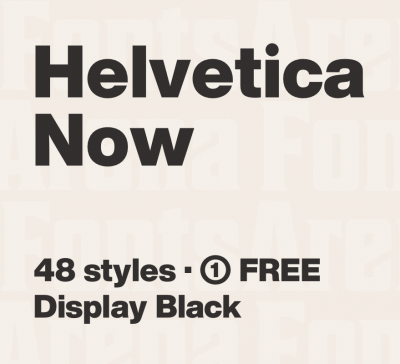

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

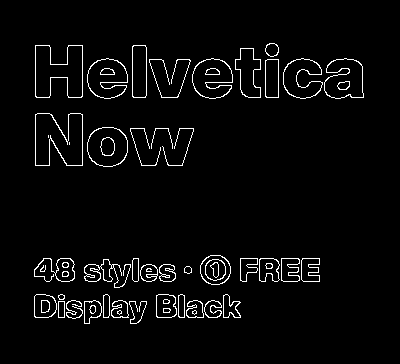

In [6]:
cv2_imshow(edges)

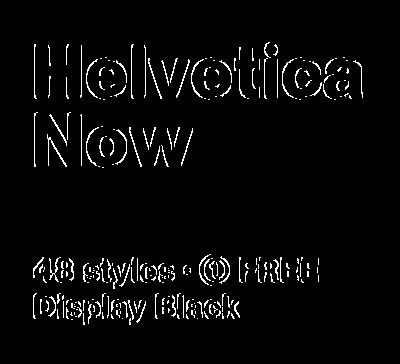

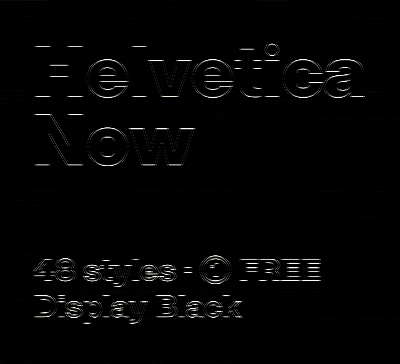

In [26]:
#Horizontal edge detector
#Kernel captures horizontal lines, and ignores cross and vertical lines
#While 1,0,1 in top row filters top lines, 1,0,1 in bottom row captures bottom lines

#kernel = np.float32([[1,0,1],[-1,0,-1],[0,0,0]]) - Top lines
#kernel = np.float32([[0,0,0],[-1,0,-1],[1,0,1]]) - Bottom lines


kernel = np.float32([[1.05,0,1.05],[-2,0,-2],[1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

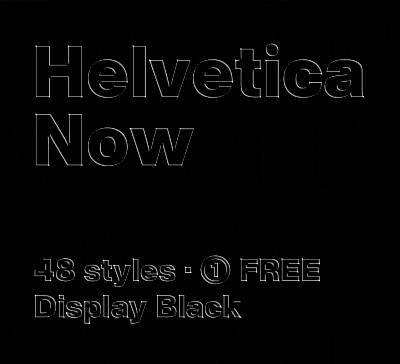

In [9]:
#Original negative
kernel = np.float32([[0,0,1],[0,-2,0],[1,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

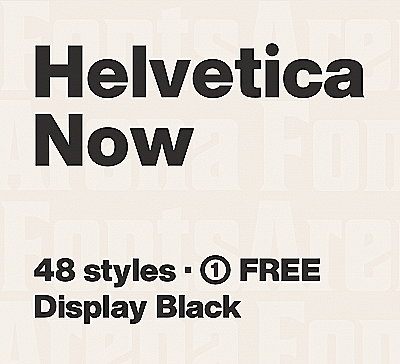

In [10]:
#Sharpen
#Kernel sharpens the input image, center point of the kernel has high value and amplifies the image
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

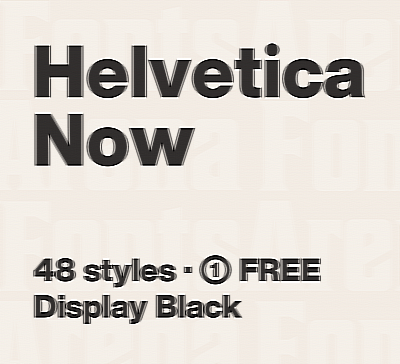

In [27]:
#Blurr
# One version of kernel to make input image blurr
kernel = np.float32([[0,-1,0],[1,1,1],[0,-1,0]])
#kernel = np.float32([[1,-2,1],[1,-2,1],[1,-2,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

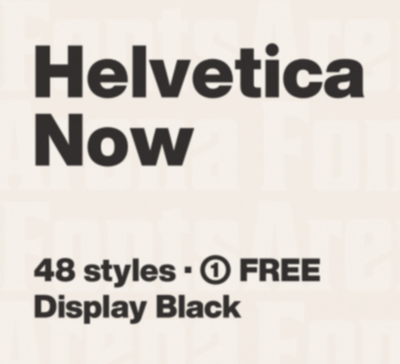

In [0]:
#Blurr
#Another version of Kernel which blurrs the input image

kernel = np.float32([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

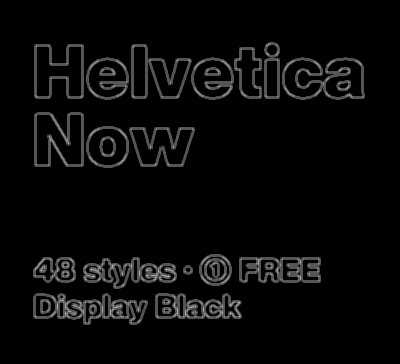

In [30]:
#Another versio n of blurr, retaining the edges, filtering out background color
#This kernel is simple normalisation

kernel = np.ones((3,3),np.float32)/9
#kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)

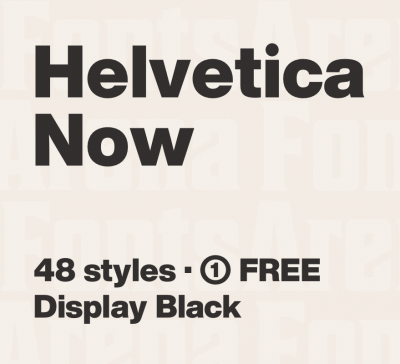

In [0]:
#Identity
#This kernel retains the input image as-is, without changing the image.
#This kernel passes the input image as-is to next layer

kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

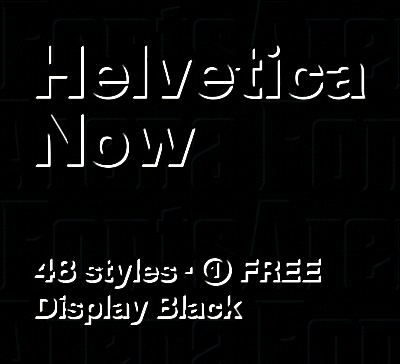

In [73]:
import math
#45 deg
#kernel = np.float32([[0,0,-1],[1,0,1],[0,0,-1]])
#kernel = np.float32([[1,1,1],[1,1,1],[1,1,1]])/9

#kernelx = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])
#kernely = np.float32([[-1,0,1],[-2,0,2],[-1,0,1]])

#kernel = np.float32([[0,-25,1],[-25,5,-25],[1,-25,0]])
#kernel = np.float32([[0,-1,0],[1,0,1],[0,-1,0]])
kernel = np.float32([[-2,-1,0],[-1,0,1],[0,1,2]])


#kernel = math.sqrt(kernelx**2 + kernely**2)
#print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

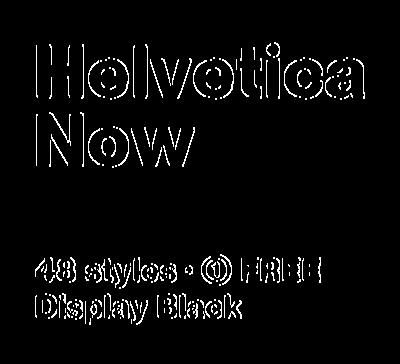

In [31]:
#Blurr
kernel = np.float32([[1,0,-1],[2,0,-2],[1,0,-1]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)